### MapMyRun Data

Import Packages

In [16]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [17]:
import pandas as pd
import seaborn as sns
sns.set()
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
temp.head(2)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"May 14, 2022","May 14, 2022",Run,419,3.1,1851,9.95161,0.0,6.02917,0.0,NaN,4903.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6578154748
1,"May 13, 2022","May 13, 2022",Run,814,6.2,3430,9.22043,0.0,6.50729,0.0,149.0,9155.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6574579711


In [18]:
headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
temp.rename(columns = headers_dict, inplace=True)

In [19]:
temp['Workout_Date'] = pd.to_datetime(temp['Workout_Date'])
temp['Date_Submitted'] = pd.to_datetime(temp['Date_Submitted'])
mean_speed = temp['Avg_Heart_Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
temp['day_of_week']=temp['Workout_Date'].dt.day_name()
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   666 non-null    datetime64[ns]
 1   Workout_Date     666 non-null    datetime64[ns]
 2   Activity_Type    666 non-null    object        
 3   Calories_Burned  666 non-null    int64         
 4   Distance         666 non-null    float64       
 5   Workout_Time     666 non-null    int64         
 6   Avg_Pace         666 non-null    float64       
 7   Max_Pace         666 non-null    float64       
 8   Avg_Speed        666 non-null    float64       
 9   Max Speed        666 non-null    float64       
 10  Avg_Heart_Rate   439 non-null    float64       
 11  Steps            642 non-null    float64       
 12  Notes            666 non-null    object        
 13  Source           666 non-null    object        
 14  Link             666 non-null    object   

In [20]:
temp[temp.Avg_Heart_Rate == 0] = np.nan
#temp[temp.Max_Pace == 0] = np.nan


In [21]:
temp.fillna(temp.Avg_Heart_Rate.median(), inplace = True)
#temp.fillna(temp.Max_Pace.median(), inplace = True)
temp.head()

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max Speed,Avg_Heart_Rate,Steps,Notes,Source,Link,day_of_week
0,2022-05-14 00:00:00,2022-05-14 00:00:00,Run,419.0,3.10000,1851.0,9.95161,0.000000,6.02917,0.0000,149.0,4903.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6578154748,Saturday
1,2022-05-13 00:00:00,2022-05-13 00:00:00,Run,814.0,6.20000,3430.0,9.22043,0.000000,6.50729,0.0000,149.0,9155.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6574579711,Friday
2,2022-05-11 00:00:00,2022-05-11 00:00:00,Run,656.0,5.00117,2989.0,9.95615,1.083180,6.02642,55.3924,146.0,7917.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6570492340,Wednesday
3,2022-05-09 00:00:00,2022-05-09 00:00:00,Run,391.0,3.10777,1802.0,9.65751,0.935857,6.21278,64.1124,140.0,4782.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6565419007,Monday
4,2022-05-08 00:00:00,2022-05-08 00:00:00,Run,313.0,2.35281,1376.0,9.73759,1.029330,6.16169,58.2904,156.0,3622.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6564195706,Sunday


In [22]:
temp_df = pd.DataFrame(temp)
temp_df.drop(['Notes', 'Source', 'Link', 'Max Speed', 'Max_Pace'], axis = 1, inplace = True)
temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd
upd3 = upd2[upd2['Avg_Pace'].between(6, 13)]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Workout_Date'], ascending=True)
#upd5 = upd4[upd4['Avg_Pace'] < 13]
df = upd4[upd4['Activity_Type'] == 'Run']
df['Calculated'] = df['Workout_Time'] / 60
df.count()

Date_Submitted     435
Workout_Date       435
Activity_Type      435
Calories_Burned    435
Distance           435
Workout_Time       435
Avg_Pace           435
Avg_Speed          435
Avg_Heart_Rate     435
Steps              435
day_of_week        435
Calculated         435
dtype: int64

In [23]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])
#df.drop(['Max_Pace', 'Max Speed'])
df.sort_values(by=['Workout_Date'], ascending=False)

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,day_of_week,Calculated
0,2022-05-14 00:00:00,2022-05-14,Run,419.0,3.10,1851.0,9.95,6.03,149.0,4903.0,Saturday,30.850000
1,2022-05-13 00:00:00,2022-05-13,Run,814.0,6.20,3430.0,9.22,6.51,149.0,9155.0,Friday,57.166667
2,2022-05-11 00:00:00,2022-05-11,Run,656.0,5.00,2989.0,9.96,6.03,146.0,7917.0,Wednesday,49.816667
3,2022-05-09 00:00:00,2022-05-09,Run,391.0,3.11,1802.0,9.66,6.21,140.0,4782.0,Monday,30.033333
4,2022-05-08 00:00:00,2022-05-08,Run,313.0,2.35,1376.0,9.74,6.16,156.0,3622.0,Sunday,22.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
617,2019-07-05 00:00:00,2019-07-05,Run,156.0,1.52,843.0,9.24,6.49,160.0,2313.0,Friday,14.050000
620,2019-07-04 00:00:00,2019-07-04,Run,156.0,1.53,816.0,8.88,6.76,159.0,2215.0,Thursday,13.600000
623,2019-07-02 00:00:00,2019-07-02,Run,95.0,1.02,552.0,9.02,6.65,148.0,1439.0,Tuesday,9.200000
628,2019-06-29 00:00:00,2019-06-29,Run,118.0,1.27,693.0,9.13,6.57,150.0,1824.0,Saturday,11.550000


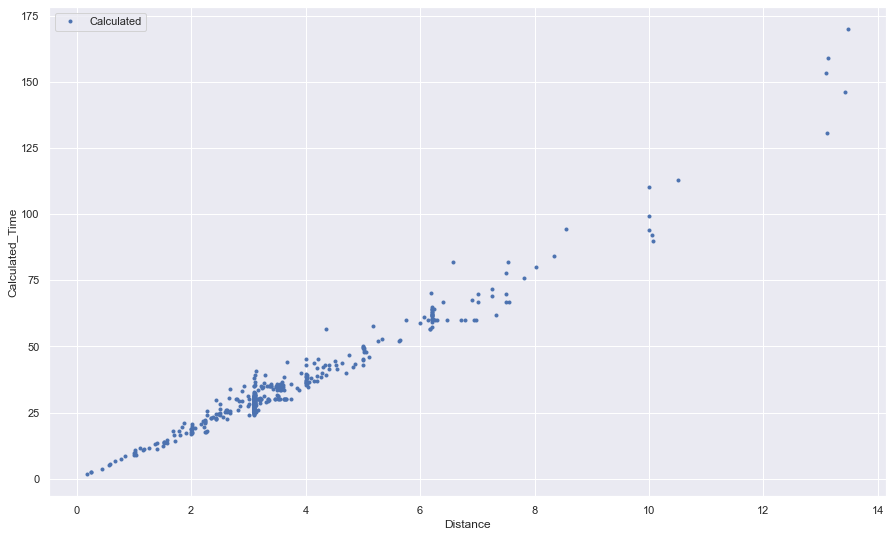

In [24]:

axes = df.plot(x='Distance', y='Calculated', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Calculated_Time')

In [25]:
from scipy import stats

In [26]:
linear_regression = stats.linregress(x=df.Calculated,y=df.Distance)

In [27]:
linear_regression.slope

0.09112689973312972

In [28]:
linear_regression.intercept

0.4467925845287368

* We can use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for any given year.
* In the following calculation, `linear_regression.slope` is **_m_**, our input year is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**.
* We can also predict the approximate difference between one year and another.

In [29]:
Half = linear_regression.slope * 13.1 + linear_regression.intercept 
print(Half) 


1.640554971032736


In [30]:
Full = linear_regression.slope * 26.2 + linear_regression.intercept
print(Full-Half)

1.1937623865039992


### Plotting the Regression Line
* Seaborn’s **`regplot` function** plots each data point with one attribute on the **_x_****-axis and the other on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [31]:
import seaborn as sns
sns.set_style('whitegrid')

(-11.892459924823847, 178.50440285356302)

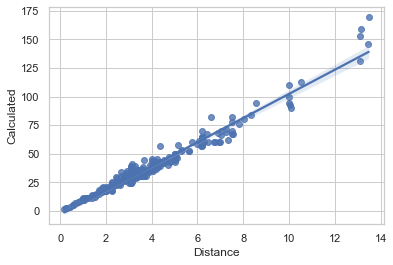

In [32]:
axes = sns.regplot(x=df.Distance, y=df.Calculated)
axes.set_ylim()

## EDA FOR PLOTTING


### summary statistics

In [33]:
df.head(1)


,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,day_of_week,Calculated
0,2022-05-14 00:00:00,2022-05-14,Run,419.0,3.1,1851.0,9.95,6.03,149.0,4903.0,Saturday,30.85


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 658
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   435 non-null    object        
 1   Workout_Date     435 non-null    datetime64[ns]
 2   Activity_Type    435 non-null    object        
 3   Calories_Burned  435 non-null    float64       
 4   Distance         435 non-null    float64       
 5   Workout_Time     435 non-null    float64       
 6   Avg_Pace         435 non-null    float64       
 7   Avg_Speed        435 non-null    float64       
 8   Avg_Heart_Rate   435 non-null    float64       
 9   Steps            435 non-null    float64       
 10  day_of_week      435 non-null    object        
 11  Calculated       435 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 44.2+ KB


In [35]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

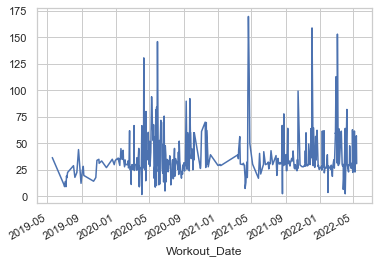

In [36]:
# show data of one subject
mask1 = df['Activity_Type'] == 'Run'
(
    df[mask1]
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

### plot the average of `Calculated` data


<AxesSubplot:xlabel='day_of_week'>

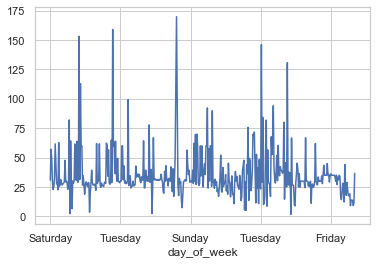

In [37]:
# basic approach to plot using matplotlib w/ chaining approach
(
    df
    .set_index('day_of_week')
    ['Calculated']
    .plot()
)

<AxesSubplot:xlabel='Workout_Date'>

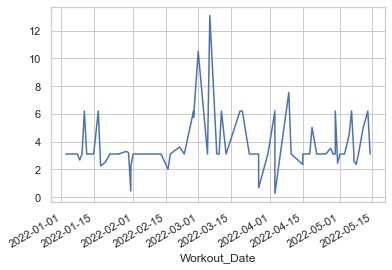

In [38]:
# check runs for 2022
(
    df
    .set_index('Workout_Date')
    .query('Workout_Date > 20220101')
    ['Distance']
    .plot()
)


In [39]:
# get the agg of a col
group = df.groupby(
    'Date_Submitted').count(

    ).sort_values(
        by=['Workout_Date'],
         ascending=False)

In [40]:
group.head()

,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,day_of_week,Calculated
Date_Submitted,,,,,,,,,,,
2021-09-13,3,3,3,3,3,3,3,3,3,3,3
2022-02-12,3,3,3,3,3,3,3,3,3,3,3
2020-01-18,3,3,3,3,3,3,3,3,3,3,3
2022-03-31,3,3,3,3,3,3,3,3,3,3,3
2020-06-26,3,3,3,3,3,3,3,3,3,3,3


### correlation matrix / Pairplot


In [41]:
df.head(2)

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,day_of_week,Calculated
0,2022-05-14 00:00:00,2022-05-14,Run,419.0,3.1,1851.0,9.95,6.03,149.0,4903.0,Saturday,30.850000
1,2022-05-13 00:00:00,2022-05-13,Run,814.0,6.2,3430.0,9.22,6.51,149.0,9155.0,Friday,57.166667


In [42]:
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

### Heatmap - correlation


In [43]:
# show the correlation matrix
df.corr()


,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.972690,0.969640,0.260834,-0.251845,0.098138,0.962944,0.969640
Distance,0.972690,1.000000,0.981397,0.212696,-0.207611,0.063192,0.983997,0.981397
Workout_Time,0.969640,0.981397,1.000000,0.366120,-0.355166,0.040333,0.988772,1.000000
Avg_Pace,0.260834,0.212696,0.366120,1.000000,-0.989326,-0.118891,0.320367,0.366120
Avg_Speed,-0.251845,-0.207611,-0.355166,-0.989326,1.000000,0.117571,-0.316095,-0.355166
Avg_Heart_Rate,0.098138,0.063192,0.040333,-0.118891,0.117571,1.000000,0.040609,0.040333
Steps,0.962944,0.983997,0.988772,0.320367,-0.316095,0.040609,1.000000,0.988772
Calculated,0.969640,0.981397,1.000000,0.366120,-0.355166,0.040333,0.988772,1.000000


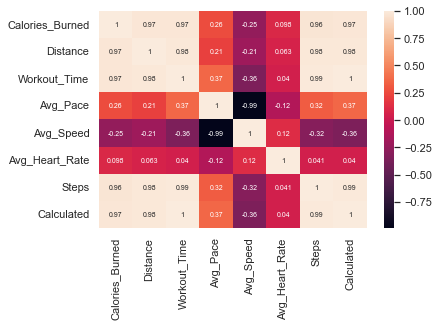

In [44]:
# Default heatmap
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


In [45]:
# show columns
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

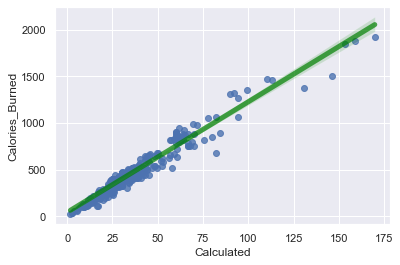

In [46]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# plot
sns.regplot(x=df["Calculated"], y=df["Calories_Burned"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()


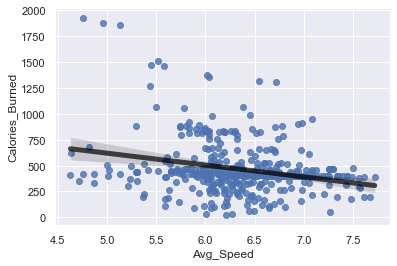

In [47]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Avg_Speed"], y=df["Calories_Burned"],
            line_kws={"color": "black", "alpha": 0.7, "lw": 5})
plt.show()


In [48]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate',
       'Steps', 'day_of_week', 'Calculated'],
      dtype='object')

<AxesSubplot:>

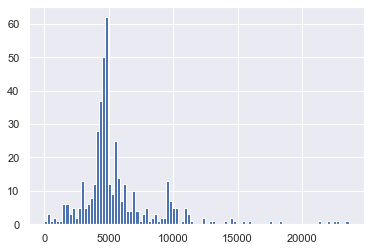

In [49]:
mask1 = df['Steps'] == 0  # get the rows where steps count is 0
df[~mask1]['Steps'].hist(bins=100)


In [50]:
df2 = df[['Workout_Date', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed',
       'Avg_Heart_Rate', 'Steps',
       'Calculated', 'day_of_week']]
df2.corr()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.972690,0.969640,0.260834,-0.251845,0.098138,0.962944,0.969640
Distance,0.972690,1.000000,0.981397,0.212696,-0.207611,0.063192,0.983997,0.981397
Workout_Time,0.969640,0.981397,1.000000,0.366120,-0.355166,0.040333,0.988772,1.000000
Avg_Pace,0.260834,0.212696,0.366120,1.000000,-0.989326,-0.118891,0.320367,0.366120
Avg_Speed,-0.251845,-0.207611,-0.355166,-0.989326,1.000000,0.117571,-0.316095,-0.355166
Avg_Heart_Rate,0.098138,0.063192,0.040333,-0.118891,0.117571,1.000000,0.040609,0.040333
Steps,0.962944,0.983997,0.988772,0.320367,-0.316095,0.040609,1.000000,0.988772
Calculated,0.969640,0.981397,1.000000,0.366120,-0.355166,0.040333,0.988772,1.000000


In [51]:
df2.describe().round(2)

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Calculated
count,435.00,435.00,435.00,435.00,435.00,435.00,435.00,435.00
mean,467.18,3.71,2150.08,9.55,6.33,149.52,5696.23,35.83
std,253.45,1.92,1242.98,0.88,0.56,8.56,3208.47,20.72
min,19.00,0.18,106.00,7.77,4.63,76.00,8.00,1.77
25%,383.00,3.10,1596.50,8.98,6.04,149.00,4257.00,26.61
50%,411.00,3.10,1800.00,9.50,6.32,149.00,4806.00,30.00
75%,478.50,4.01,2303.00,9.94,6.68,153.00,6201.00,38.38
max,1928.00,13.48,10191.00,12.95,7.72,169.00,23604.00,169.85


In [52]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Distance'][:-1] # -1 means that the latest row is SalePrice
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Distance:\n{}".format(len(top_features), top_features))

There are 4 strongly correlated values with Distance:
Distance           1.000000
Steps              0.983997
Workout_Time       0.981397
Calories_Burned    0.972690
Name: Distance, dtype: float64


<AxesSubplot:>

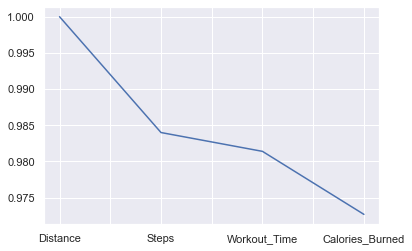

In [53]:
top_features.plot()

## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


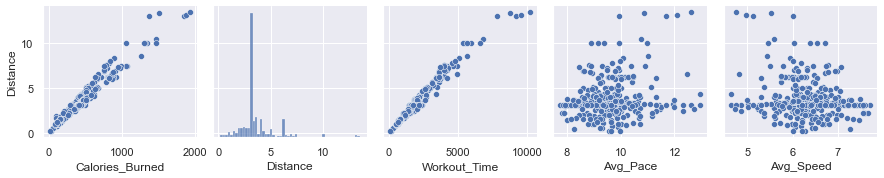

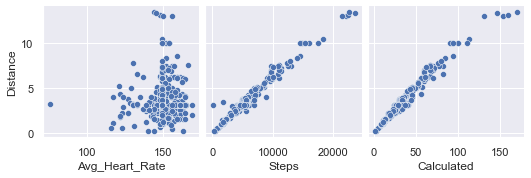

In [54]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Distance'])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'Distance' distribution using the `distplot()` function from the `seaborn` library.


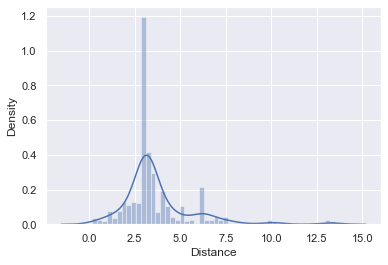

In [55]:
df_untransformed = sns.distplot(df2['Distance'])

As the plot shows, 'Distance' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


In [56]:
print("Skewness: %f" % df2['Distance'].skew())

Skewness: 2.160800


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have \~1.7, so it is considered  highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) contains more information about the numpy log transform.


In [57]:
log_transformed = np.log(df2['Distance'])

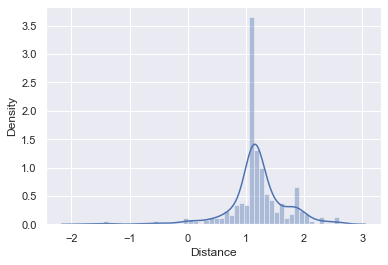

In [58]:
df_transformed = sns.distplot(log_transformed)

As we can see, the log method transformed the 'Distance' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range.

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [59]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -1.165110


In [60]:
df2.index.is_unique

True

## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.


In [61]:
norm_data = MinMaxScaler().fit_transform(df_num)
norm_data

array([[0.20953379, 0.21954887, 0.17302925, ..., 0.78494624, 0.20745042,
        0.17302925],
       [0.4164484 , 0.45263158, 0.32959841, ..., 0.78494624, 0.38765045,
        0.32959841],
       [0.33368256, 0.36240602, 0.2858701 , ..., 0.75268817, 0.33518393,
        0.2858701 ],
       ...,
       [0.03981142, 0.06315789, 0.0442241 , ..., 0.77419355, 0.06064587,
        0.0442241 ],
       [0.05185961, 0.08195489, 0.05820526, ..., 0.79569892, 0.0769622 ,
        0.05820526],
       [0.20953379, 0.22030075, 0.20733763, ..., 0.67741935, 0.2240634 ,
        0.20733763]])

Note the data is now a `ndarray`


we can also standardize our data.


In [62]:
scaled_data = StandardScaler().fit_transform(df_num)
scaled_data

array([[-0.19030649, -0.31867409, -0.24089374, ..., -0.0607659 ,
        -0.24751625, -0.24089374],
       [ 1.37000329,  1.29473688,  1.03089876, ..., -0.0607659 ,
         1.07925296,  1.03089876],
       [ 0.74587938,  0.6701907 ,  0.67569896, ..., -0.41164863,
         0.69295468,  0.67569896],
       ...,
       [-1.47015551, -1.4012208 , -1.28716255, ..., -0.17772681,
        -1.32840254, -1.28716255],
       [-1.37930203, -1.27110701, -1.17359527, ...,  0.05619501,
        -1.20826939, -1.17359527],
       [-0.19030649, -0.31346954,  0.0377891 , ..., -1.230375  ,
        -0.12519886,  0.0377891 ]])

## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [63]:
df2.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated',
       'day_of_week'],
      dtype='object')

<AxesSubplot:xlabel='Distance'>

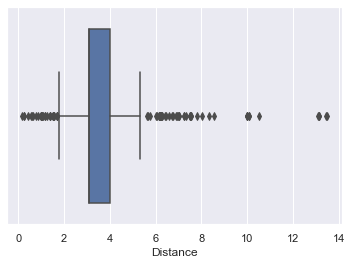

In [64]:
sns.boxplot(x=df2['Distance'])

<AxesSubplot:xlabel='Avg_Speed'>

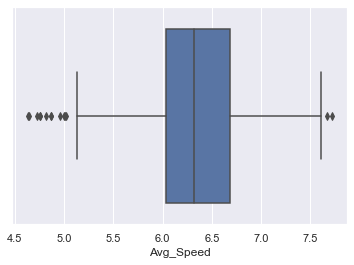

In [65]:
sns.boxplot(x=df2['Avg_Speed'])

<AxesSubplot:xlabel='Avg_Heart_Rate'>

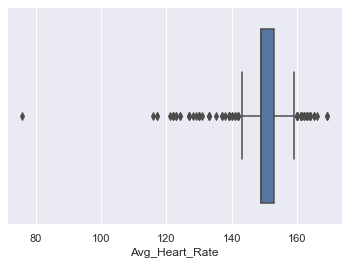

In [66]:
sns.boxplot(x=df2['Avg_Heart_Rate'])

### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


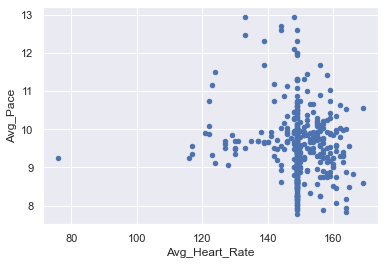

In [67]:
price_area = df2.plot.scatter(x='Avg_Heart_Rate',
                      y='Avg_Pace')

### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [68]:
# df2.sort_values(by = 'Max Speed', ascending = False)[:2]

In [69]:
# outliers_dropped = df.drop([df.index[[529,159]]])

## Z-score Analysis


Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) site.


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [70]:
# df2['Distance'] = stats.zscore(df2['Distance'])
# df2[['Distance','Distance']].describe().round(3)

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 5.084 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.


### ML

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#Check for null values before testing/training
df2.isnull().sum()

Workout_Date       0
Calories_Burned    0
Distance           0
Workout_Time       0
Avg_Pace           0
Avg_Speed          0
Avg_Heart_Rate     0
Steps              0
Calculated         0
day_of_week        0
dtype: int64

# Exploratory Data Analysis

In [74]:
#Using the sample function pulls a random sample from the dataframe

sample = df.sample(n=10, replace=False)
print(sample.iloc[:,4:])

     Distance  Workout_Time  Avg_Pace  Avg_Speed  Avg_Heart_Rate    Steps  \
159      6.40        4016.0     10.46       5.74           148.0  10673.0   
270     10.06        5537.0      9.17       6.54           149.0  14787.0   
151      3.10        1748.0      9.38       6.39           150.0   4658.0   
312      2.06        1157.0      9.37       6.41           157.0   3131.0   
406      8.02        4808.0      9.99       6.00           149.0  12937.0   
94       3.11        1743.0      9.35       6.42           156.0   4610.0   
471      3.52        2065.0      9.78       6.14           149.0   5479.0   
414      3.10        1631.0      8.77       6.84           149.0   4377.0   
350      4.02        2317.0      9.61       6.24           151.0   6298.0   
249      3.10        1632.0      8.77       6.84           149.0   4379.0   

    day_of_week  Calculated  
159      Friday   66.933333  
270   Wednesday   92.283333  
151   Wednesday   29.133333  
312      Monday   19.283333  
40

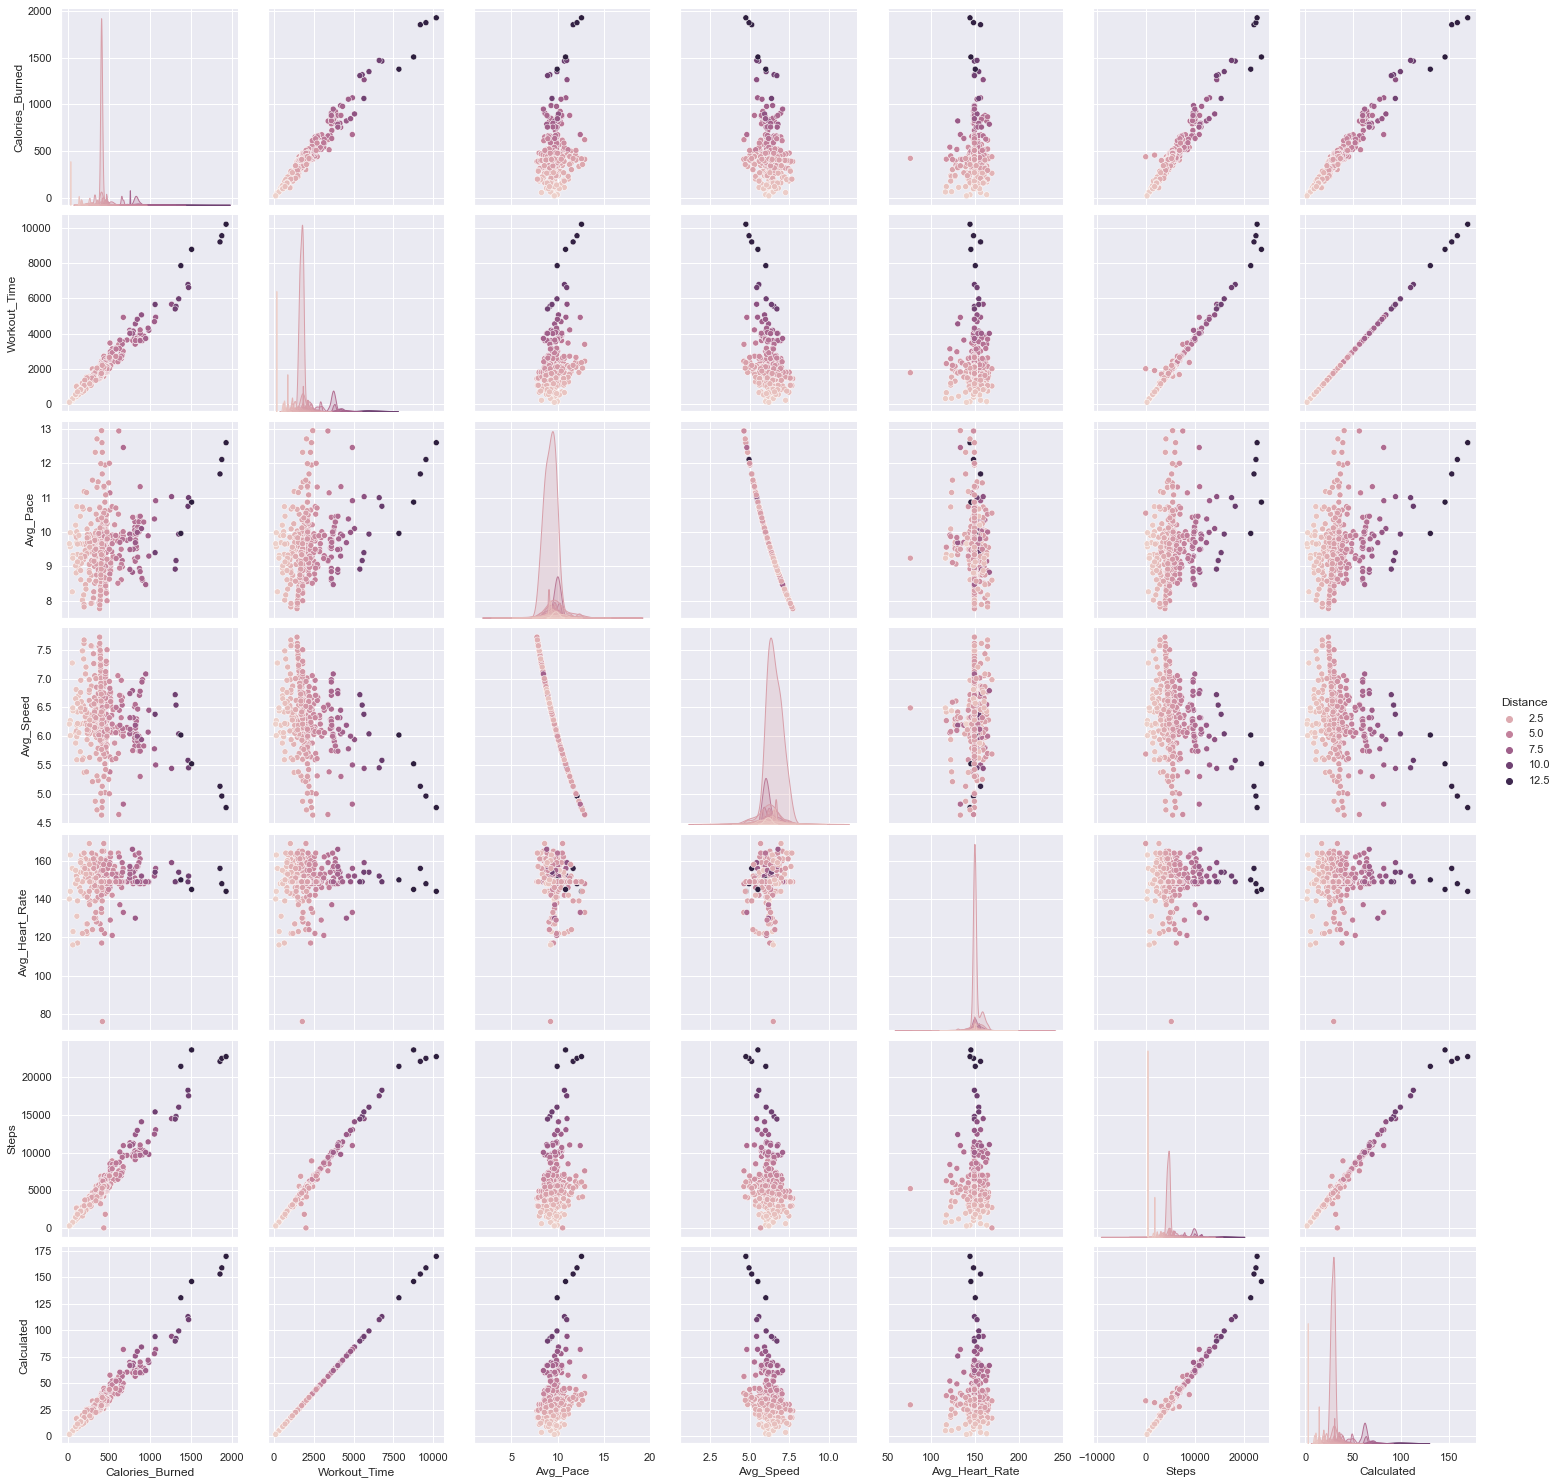

In [75]:
sns.pairplot(df2,
hue='Distance', size=3)

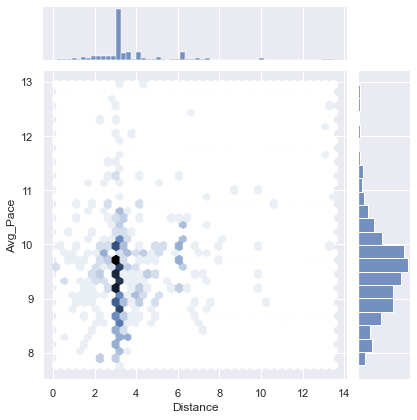

In [76]:
sns.jointplot(x=df2['Distance'],
y=df2['Avg_Pace'], kind='hex')

In [77]:
# plot = sns.FacetGrid(df2, col='Distance',
# margin_titles=True)
# plot.map(plt.hist, 'Avg_Heart_Rate', color = 'red')

## EDA Part Two

In [78]:
df2.head()

,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Calculated,day_of_week
0,2022-05-14,419.0,3.10,1851.0,9.95,6.03,149.0,4903.0,30.850000,Saturday
1,2022-05-13,814.0,6.20,3430.0,9.22,6.51,149.0,9155.0,57.166667,Friday
2,2022-05-11,656.0,5.00,2989.0,9.96,6.03,146.0,7917.0,49.816667,Wednesday
3,2022-05-09,391.0,3.11,1802.0,9.66,6.21,140.0,4782.0,30.033333,Monday
4,2022-05-08,313.0,2.35,1376.0,9.74,6.16,156.0,3622.0,22.933333,Sunday


Let's find out how many entries there are in our dataset, using `shape` function.


In [79]:
df2.shape

(435, 10)

Using `info` function, we will take a look at our types of data.


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 658
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Workout_Date     435 non-null    datetime64[ns]
 1   Calories_Burned  435 non-null    float64       
 2   Distance         435 non-null    float64       
 3   Workout_Time     435 non-null    float64       
 4   Avg_Pace         435 non-null    float64       
 5   Avg_Speed        435 non-null    float64       
 6   Avg_Heart_Rate   435 non-null    float64       
 7   Steps            435 non-null    float64       
 8   Calculated       435 non-null    float64       
 9   day_of_week      435 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 53.5+ KB


Using `columns` method, we will print all the column names.


In [81]:
df2.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated',
       'day_of_week'],
      dtype='object')

Below, we will check for any missing values.


In [82]:
df2.isnull().sum()

Workout_Date       0
Calories_Burned    0
Distance           0
Workout_Time       0
Avg_Pace           0
Avg_Speed          0
Avg_Heart_Rate     0
Steps              0
Calculated         0
day_of_week        0
dtype: int64

## **Data Wrangling**

### Selecting and renaming the columns of interest


Below, we are filtering our data, by selecting only the relevant columns. Also, we are using the `rename()` method to change the name of the columns.


In [83]:
df3 = (df2[['Workout_Date','Calories_Burned','Distance','Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated', 'day_of_week']]).rename(columns={"Calculated" : "Minutes"})
df3[['Minutes']] = df3[['Minutes']].round(2)
df3.head()

,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,day_of_week
0,2022-05-14,419.0,3.10,1851.0,9.95,6.03,149.0,4903.0,30.85,Saturday
1,2022-05-13,814.0,6.20,3430.0,9.22,6.51,149.0,9155.0,57.17,Friday
2,2022-05-11,656.0,5.00,2989.0,9.96,6.03,146.0,7917.0,49.82,Wednesday
3,2022-05-09,391.0,3.11,1802.0,9.66,6.21,140.0,4782.0,30.03,Monday
4,2022-05-08,313.0,2.35,1376.0,9.74,6.16,156.0,3622.0,22.93,Sunday


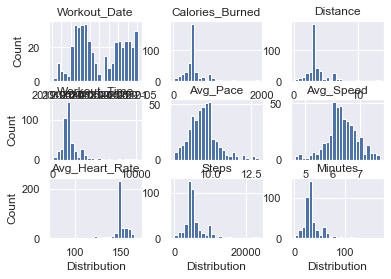

In [84]:
# To create four separate plots, use Pandas `.hist` method
axList = df3.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')
### END SOLUTION

Text(0.5, 1.0, 'Category Histogram')

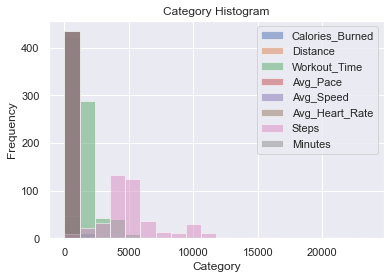

In [85]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = df3.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

## Pandas boxplot

Using Pandas, make a boxplot of each measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

array([[<AxesSubplot:title={'center':'Avg_Heart_Rate'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Avg_Pace'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Avg_Speed'}, xlabel='[day_of_week]'>],
       [<AxesSubplot:title={'center':'Calories_Burned'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Distance'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Minutes'}, xlabel='[day_of_week]'>],
       [<AxesSubplot:title={'center':'Steps'}, xlabel='[day_of_week]'>,
        <AxesSubplot:title={'center':'Workout_Time'}, xlabel='[day_of_week]'>,
        <AxesSubplot:>]], dtype=object)

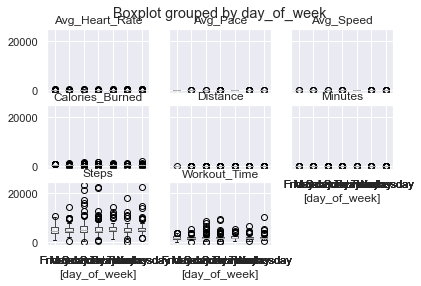

In [86]:
df3.boxplot(by='day_of_week')


## Barplot

In [87]:
df3.head()

,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,day_of_week
0,2022-05-14,419.0,3.10,1851.0,9.95,6.03,149.0,4903.0,30.85,Saturday
1,2022-05-13,814.0,6.20,3430.0,9.22,6.51,149.0,9155.0,57.17,Friday
2,2022-05-11,656.0,5.00,2989.0,9.96,6.03,146.0,7917.0,49.82,Wednesday
3,2022-05-09,391.0,3.11,1802.0,9.66,6.21,140.0,4782.0,30.03,Monday
4,2022-05-08,313.0,2.35,1376.0,9.74,6.16,156.0,3622.0,22.93,Sunday


In [88]:
df3['day_of_week']=df3['Workout_Date'].dt.day_name()
df3.head()

,Workout_Date,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,day_of_week
0,2022-05-14,419.0,3.10,1851.0,9.95,6.03,149.0,4903.0,30.85,Saturday
1,2022-05-13,814.0,6.20,3430.0,9.22,6.51,149.0,9155.0,57.17,Friday
2,2022-05-11,656.0,5.00,2989.0,9.96,6.03,146.0,7917.0,49.82,Wednesday
3,2022-05-09,391.0,3.11,1802.0,9.66,6.21,140.0,4782.0,30.03,Monday
4,2022-05-08,313.0,2.35,1376.0,9.74,6.16,156.0,3622.0,22.93,Sunday


In [89]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

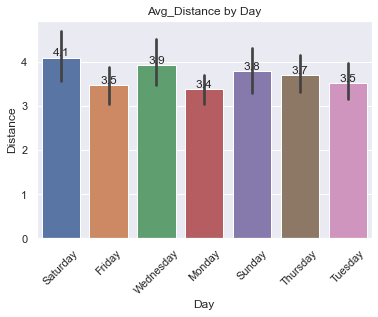

In [90]:
days = sns.barplot(x='day_of_week',y='Distance', data=df3)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')
show_values(days)

In [91]:
df3.columns

Index(['Workout_Date', 'Calories_Burned', 'Distance', 'Workout_Time',
       'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Minutes',
       'day_of_week'],
      dtype='object')

Text(0.5, 1.0, 'Minutes by Distance')

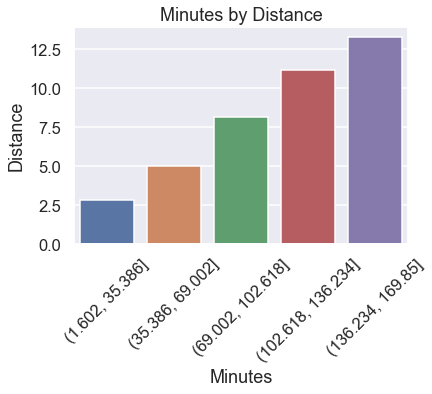

In [92]:
sns.set_context("talk")

sns.barplot(y='Distance', x=pd.cut(
    df3['Minutes'], bins = 5),
    data=df2, ci=None)

plt.ylabel('Distance')
plt.xlabel('Minutes')
plt.xticks(rotation = 45)
plt.title('Minutes by Distance')

In [93]:
pairplot = df3[['Distance', 'Steps', 'Calculated', 'Calories_Burned']]
sns.pairplot(pairplot, hue='Steps')

KeyError: "['Calculated'] not in index"

In [ ]:
import matplotlib.pyplot as plt
sns.set_context("poster")
jplot = sns.jointplot(x=df3['Distance'], y=df3['Minutes'], kind='hex')
#jplot.fig.suptitle('Minutes by Steps', loc = 'right', fontsize = 14)
plt.ylabel('Minutes', fontsize = 13)
plt.xlabel('Distance', fontsize = 13)
#plt.xticks(rotation = 45)
jplot.fig.set_figwidth(9)
jplot.fig.set_figheight(9)
plt.title('Minutes by Distance', y = 1.2, loc = 'left', fontsize = 14)


In [ ]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Distance', y='day_of_week', data=df3, orient = 'h', hue = (pd.cut(df3['Avg_Heart_Rate'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

## Parametric vs. Non-parametric

Parametric (finite number of distributions)

Non-parametric we make fewer assumptions

Maximum Likelihood Estimation: Related to probability and is a function of the parameters model.

Uniform distribution (uniform because there is an equal chance you will get any of the values as an output of the distribution)

Gaussian/Normal - Most likely value is the value closest to the mean. Further out values are equally unlikely.

Central limit theorum - take the average value from random samples. The distribution of those averages will be a normal curve. 

Log Normal - If you take the log of a variable you will have the normal distribution.

Exponential Curve - Most values closer to the left side. Often used to same what will be the amount of time before the next event.

Poisson - The number of events that happen during a certain amount of time. 

### Frequentist - Repeated observations in the limit.

Queueing theory - study of working with queues or lines. How much supply do we need to handle the demand (web servers for frequencies, waiters for customers at a restaurant)

Processes may have true frequencies - we are interested in modeling as many repeats of an experiment as possible. If the sample is large enough, we will have seen enough queues or lines to infer an estimate of our probabilities.

Derive the probalistic property of a procedure.

The more data we have the more confident we can be.

Apply the probability directly to the observed data.

### Bayesian - Describes parameters by probability distributions

Before seeing any data, a prior distribution is formulated. X amount of people in line at a certain time period will allow us to have an estimated guess.

Prior distributed is updated after seeing the data. Our initial estimate updates once data is introduced.

The updated data is referred to as posterior distribution.

Same math and same data - the differences is the interpretation.

In [ ]:
# sns.set_style('white')
# sns.set_context('notebook')
# sns.set_palette('dark')

# f = plt.figure(figsize=(6,4))
# sns.boxplot(x='Distance', y='Avg_Heart_Rate', 
#             hue='Avg_Pace', data=df2);

In [ ]:
df3.Avg_Heart_Rate.hist()

In [ ]:
df3.hist()

In [ ]:
from scipy.stats.mstats import normaltest
normaltest(df3.Distance.values)

In [ ]:
sns.set_context('talk')
sns.pairplot(df3, hue='Distance');

## Hypothesis Testing

## Interpretation and Prediction

Gather x, y; Train the model by finding the best prediction

Focus on 

## Transformation of Data Distribution

In [ ]:
from numpy import log
from scipy.stats import boxcox

# Machine Learning

## Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

In [ ]:
df3.head()


In [ ]:
df4 = df3.drop(['Workout_Date', 'day_of_week'], axis = 1)
df4.columns

#### Visually

Plotting a histogram:

In [ ]:
df4.Distance.hist()

Does not look normal due to that right tail. Let's try to verify statistically:

In [ ]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [ ]:
normaltest(df4.Distance.values)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

In [ ]:
log_dist = np.log(df4.Distance)

In [ ]:
log_dist.hist();

In [ ]:
normaltest(log_dist)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

In [ ]:
# Instructor Solution

sqrt_dist = np.sqrt(df4.Distance)
plt.hist(sqrt_dist)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [ ]:
from scipy.stats import boxcox

In [ ]:
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [ ]:
lam

In [ ]:
df4['Distance'].hist();

In [ ]:
plt.hist(boxcox_dist);

In [ ]:
normaltest(boxcox_dist)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [ ]:
lr = LinearRegression()

In [ ]:
y_col = "Distance"

X = df4.drop(y_col, axis=1)
y = df4[y_col]

**Create Polynomial Features**

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [ ]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [ ]:
y_train_bc.shape

In [ ]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [ ]:
from scipy.special import inv_boxcox

In [ ]:
# code from above
bc_result = boxcox(df4.Distance)
boxcox_dist = bc_result[0]
lam = bc_result[1]

In [ ]:
inv_boxcox(boxcox_dist, lam)[:10]

In [ ]:
df4['Distance'].values[:10]

In [ ]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [ ]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

In [ ]:
normaltest(sqrt_dist)

## Train / Test Models

In [ ]:
# verify the shape of the array (rows by a single column)
X.shape

In [ ]:
#verify the shape of the y array
y.shape

In [ ]:
#load the linear regression value
reg = LinearRegression(fit_intercept=True)

In [ ]:
#set our fit with our arrays
reg.fit(X,y)

In [ ]:
reg.predict(X[0].reshape(-1,1))

In [ ]:
reg.predict(X[0:2])

In [ ]:
score = reg.score(X, y)
print(score)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Distance', fontsize = 24)
ax.set_ylabel('Avg_Pace', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting with and without intercept

In [ ]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    #ax[index].set_xlim(left = 0, right = 150)
   # ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

### Train Test Split

In [ ]:
df4.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df4[['Distance']], df4['Avg_Pace'], random_state=0)

In [ ]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

In [ ]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

### Regression

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Distance', y='Avg_Pace', data=df4)

In [ ]:
dummy_variables = pd.get_dummies(df4[['Distance','Avg_Pace','Calories_Burned']], drop_first=True)
dummy_variables.shape
(2394, 57)
dummy_variables.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
num_features = df4[['Distance', 'Avg_Pace', 'Workout_Time', 'Calories_Burned']]
sc = MinMaxScaler()
num_features = sc.fit_transform(num_features)

In [ ]:
cat_features = dummy_variables.values
data = np.concatenate((cat_features, num_features), axis=1)
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1]
print(X.shape)
print(y.shape)
(2394, 60)
(2394,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,
'learning_rate': 0.02, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

## Pairplot

In [ ]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
run_num = df4.select_dtypes(include = ['float64', 'int64'])
run_num_corr = run_num.corr()['Distance'][:-1]
top_features = run_num_corr[abs(run_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

In [ ]:
for i in range(0, len(run_num.columns), 5):
    sns.pairplot(data=run_num,
                x_vars=run_num.columns[i:i+5],
                y_vars=['Distance'])

In [ ]:
sp_untransformed = sns.distplot(df4['Distance'])

In [ ]:
print("Skewness: %f" % df4['Distance'].skew())

In [ ]:
log_transformed = np.log(df4['Distance'])

In [ ]:
sp_transformed = sns.distplot(log_transformed)

In [ ]:
print("Skewness: %f" % (log_transformed).skew())

In [ ]:
duplicate = df4[df4.duplicated(['Workout_Time'])]
duplicate

In [ ]:
df4.head()

In [ ]:
AHR0 = df4[['Avg_Heart_Rate']] < 0.1
AHR = df4[['Avg_Heart_Rate']].mean().round(2)
AHR

In [ ]:
X = df4.drop('Distance',axis=1)
y = df4.Distance
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
y_train.value_counts()

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
sns.pairplot(df4, vars = df4.columns[0:4])

In [ ]:
knn = 

In [ ]:
knn.fit(X=X_train, y=y_train)

In [ ]:
for column in df4:
    sns.displot(x=column, data=df4)

In [ ]:
df4.columns

In [ ]:
# Convert x column to numpy array
X = df4.loc[:, ['Calories_Burned']].values

In [ ]:
sns.displot(X, kind='kde')

In [ ]:
sns.displot(X, kde=True)

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=1000)

#create normal distribution histogram
sns.displot(X)

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#X = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(X, kind='kde')

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(df4, x='Minutes', kde=True)

In [ ]:
sns.pairplot(data = df4, vars = df.columns[3:9], hue = 'Minutes')

In [ ]:
df4.info()